# Bitfield and File Study
For my first task, I was responsible for analyzing the quality of files containing data measured for neural network training. This was done by working with bitfields, which represented segments of 100 kHz heart rate recordings, approximately 140 seconds long, and indicated their validity. A value of `1` signified valid data, while `0` indicated unusable data due to noise or other distortions. The bitfield was part of a `.json` file that included pre-labeled filenames and their corresponding bitfields.

## Libraries
The libraries used for this task were fairly straightforward. The `os` and `json` libraries, which are part of Python's standard library, were employed to load and process files. Specifically, the json library was used to read the JSON file and convert it into a Python dictionary, allowing access to the labeled data. The numpy library was used for numerical processing, particularly for saving and handling large arrays of data. It enabled the efficient storage of the heart rate signal samples and their corresponding labels in .npz files. Finally, matplotlib.pyplot was used for data visualization, helping to create line and bar graphs for analyzing the quality of the data.

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

## Electrocardiogram(ECG) view
First, let's take a look at how the heart rate data is stored and visualized. The heart rate data, typically represented as a time series, is stored in .npy files. These files contain numerical arrays, where each value corresponds to a heart rate measurement taken at specific time intervals. In this specific example, the ECG is initially displayed in a cramped view, making it hard to analyze in detail. To get a better look, we can take advantage of matplotlib to zoom in on smaller time intervals.

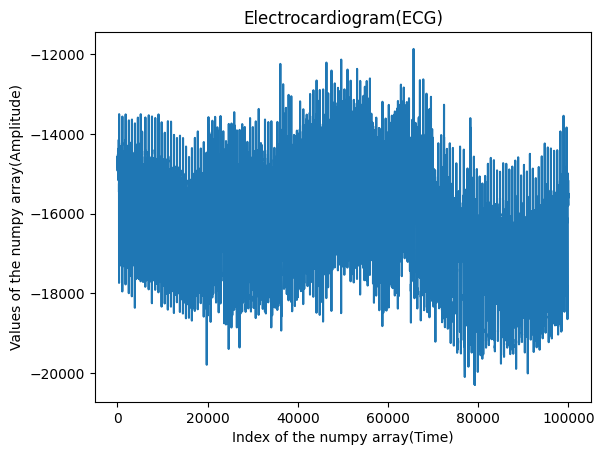

In [2]:
ecg_data = np.load(os.path.join("./data", "prod-label-1-69.npy"))

plt.plot(ecg_data)
plt.xlabel("Index of the numpy array(Time)")
plt.ylabel("Values of the numpy array(Amplitude)")
plt.title("Electrocardiogram(ECG)")
plt.show()

## Variable setup
In this section, we set up a few essential variables that will help organize and process the data.

In [3]:
group: int = 1
member: int = 0

batch: int = 1

path_json: str = "./data/labels-o.json"
path_npy_dir: str = "./data/prod-label-neuron/"

with open(path_json, "r") as file:
    file_json = json.load(file)

arr_samples: list = []
arr_labels: list = []

bitfield_data: list = []

## Bitfield study
The bitfield consists of counting the ones, which is also their sum, and appending it to the array that stores all of them for later visualization.

In [4]:
def study(bitfield: str, array: list) -> None:
    sum_ones = sum(int(char) for char in bitfield)
    array.append(sum_ones)

## Processing
To process the data, the script iterates through .npy files containing heart rate signals, checking their existence and size before extracting corresponding bitfields from the .json labels. The bitfield validity is analyzed and stored in an array for further statistical evaluation.

In [ ]:
while True:
    label = f"prod-label-{group}-{member}.npy"
    path_npy = os.path.join(path_npy_dir, label)

    if not os.path.exists(path_npy):
        print(f"File: {label} - break - file not in {path_npy_dir}")
        break 

    if label.replace("npy", "csv") not in file_json:
        member += 1
        if member == 99: 
            group += 1
            member = 0
        print(f"File: {label} - skipped - label not in {path_json}")
        continue

    tmp = np.load(path_npy)
    if len(tmp) != 100_000:
        member += 1
        if member == 99: 
            group += 1
            member = 0
        print(f"File: {label} - skipped - sample too small")
        continue
    
    arr_samples.append(tmp)
    arr_labels.append(file_json[label.replace("npy", "csv")]) 
    study(arr_labels[-1], bitfield_data)

    # Save batch every 1000 samples
    if len(arr_samples) and len(arr_labels) == 1000:
        print(f"{batch}. Batch - saved")
        np.savez(f"dict{batch}.npz", samples=np.array(arr_samples), labels=np.array(arr_labels))
        arr_samples = []
        arr_labels = []
        batch += 1

    member += 1
    if member == 99:
        group += 1
        member = 0


## Processing remaining data

In [6]:

np.savez(f"dict10.npz", samples=np.array(arr_samples), labels=np.array(arr_labels))

## Calculating thresholds

In [7]:
total_files = len(bitfield_data)
all_zeros = bitfield_data.count(0)

all_percentages = [all_zeros / total_files * 100]

for threshold in range(1, 21):
    count_threshold = sum(1 for count in bitfield_data if count >= threshold)
    all_percentages.append(count_threshold / total_files * 100)

## Visualization

In [8]:
def draw_graph_bitfield_study(array: list) -> None:
    x_values = range(len(array))
    y_values = array

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, marker='o', linestyle='-')

    plt.title('Bitfield Study')
    plt.xlabel('Number of valid bits')
    plt.ylabel('Percentage of Files')
    plt.grid()
    plt.show()

In [9]:
def draw_graph_file_study(array: list) -> None:
    x_values = range(len(array))
    y_values = array

    plt.figure(figsize=(10, 6))
    plt.bar(x_values, y_values, color='skyblue')

    plt.title('File Study')
    plt.xlabel('File index')
    plt.ylabel('Number of valid bits')
    plt.grid(axis='y')
    plt.show()

## Results

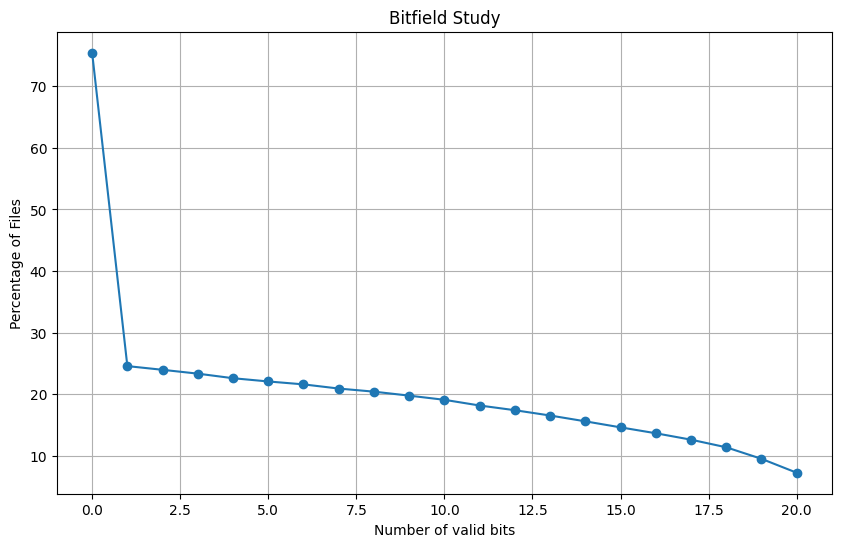

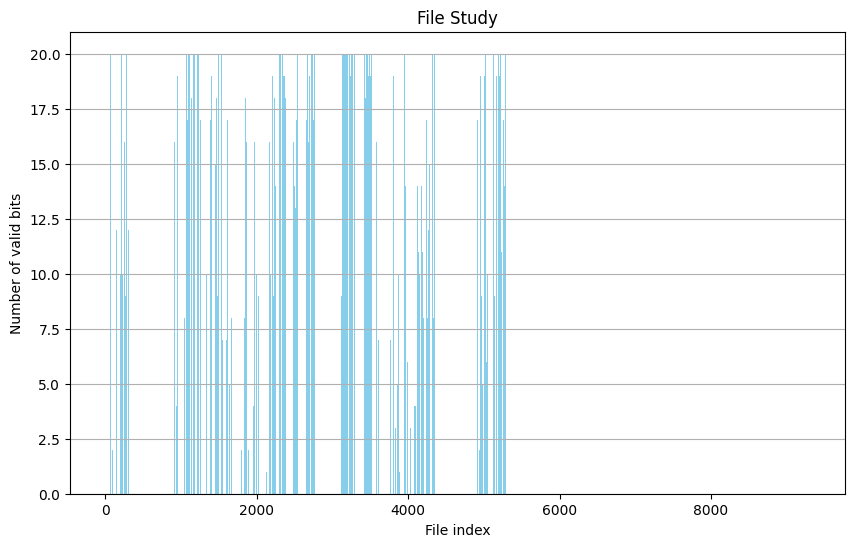

In [10]:
draw_graph_bitfield_study(all_percentages)
draw_graph_file_study(bitfield_data)

## Key Takeaways from This Task
First of all, I finally realized how useful and important the `NumPy` and `Matplotlib` libraries are. Both are lightweight and widely used across the data science industry. I also learned that, to make code more cross-platform and error-friendly, it's a good practice to always use the os library when working with paths and listing directory contents.